The United States [Bureau of Labor Statistics (BLS)](https://www.bls.gov/) surveys and calculates the monthly unemployment rate. The unemployment rate is the percentage of individuals in the labor force without a job. While unemployment rate [isn't perfect](https://en.wikipedia.org/wiki/Unemployment#Limitations_of_the_unemployment_definition), it's a commonly used proxy for the health of the economy. You may have heard politicians and reporters state the unemployment rate when commenting on the economy. You can read more about how the BLS calculates the unemployment rate [here](http://www.bls.gov/cps/cps_htgm.htm).

# Introduction to the Data

The dataset is a time series dataset, which means the data points (monthly unemployment rates) are ordered by time. 

|DATE|VALUE|
|---|---|
|1948-01-01|3.4|
|1948-02-01|3.8|
|1948-03-01|4.0|
|1948-04-01|3.9|
|1948-05-01|3.5|

The dataset contains 2 columns:

* `DATE`: date, always the first of the month.
* `VALUE`: the corresponding unemployment rate, in percent.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
unrate = pd.read_csv('../data/unrate.csv')
unrate.head()

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [3]:
unrate.dtypes

DATE      object
VALUE    float64
dtype: object

the date has been store as `object` type, it needs to be converted to `DateTime` type.

In [4]:
unrate.DATE = pd.to_datetime(unrate.DATE)
unrate.dtypes

DATE     datetime64[ns]
VALUE           float64
dtype: object

In [5]:
unrate.head(12)

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


## Observation from the table representation

We can make the following observations from the table:
    
* In 1948:
  * monthly unemployment rate ranged between 3.4 and 4.0.
  * highest unemployment rate was reached in both March and December.
  * lowest unemployment rate was reached in January.
* From January to March, unemployment rate trended up.
* From March to May, unemployment rate trended down.
* From May to August, unemployment rate trended up.
* From August to October, unemployment rate trended down.
* From October to December, unemployment rate trended up.

one thing learned from looking at the monthly unemployment rates for `1948` is that every few months, the unemployment rate switches between **trending up** and **trending down**. It's not switching direction every month, however, and this could mean that there's a seasonal effect. 

> Seasonality is when a pattern is observed on a regular, predictable basis for a specific reason.

Comparing the unemployment trends across time line charts are needed.

# Visualizing 1948 Unemployment rate

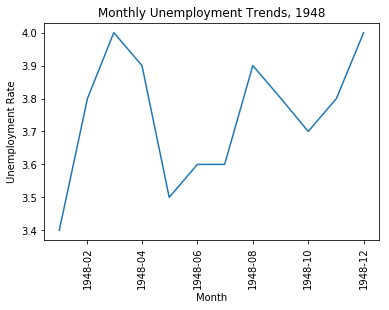

In [6]:
plt.plot(unrate.DATE.head(12), unrate.VALUE.head(12))
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel("Unemployment Rate")
plt.title("Monthly Unemployment Trends, 1948")
plt.show()

## Comparing the unemployment rate for 1948 and 1949

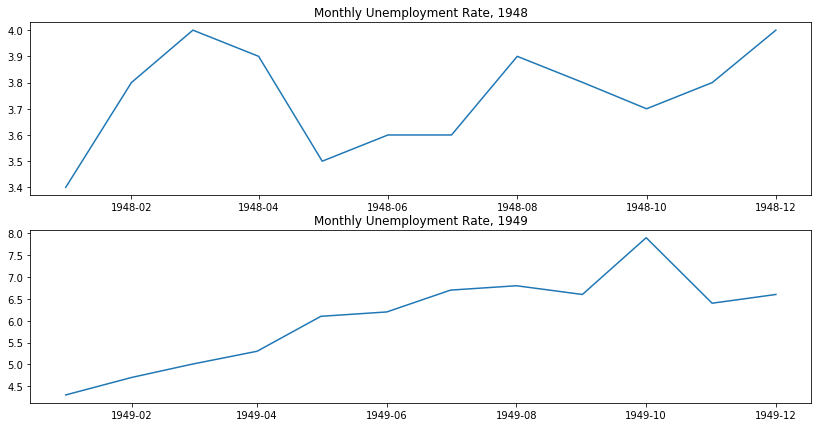

In [13]:
fig = plt.figure(figsize=(14,7))
fig_1948 = fig.add_subplot(2,1,1)
fig_1949 = fig.add_subplot(2,1,2)
fig_1948.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
fig_1949.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
fig_1948.set_title('Monthly Unemployment Rate, 1948')
fig_1949.set_title('Monthly Unemployment Rate, 1949')
plt.show()

## Comparing Across More years (1948-1952)

As seen in the above plots, it has been discovered that there's no changes in unemployment trends that are occurring in the same month in both years.

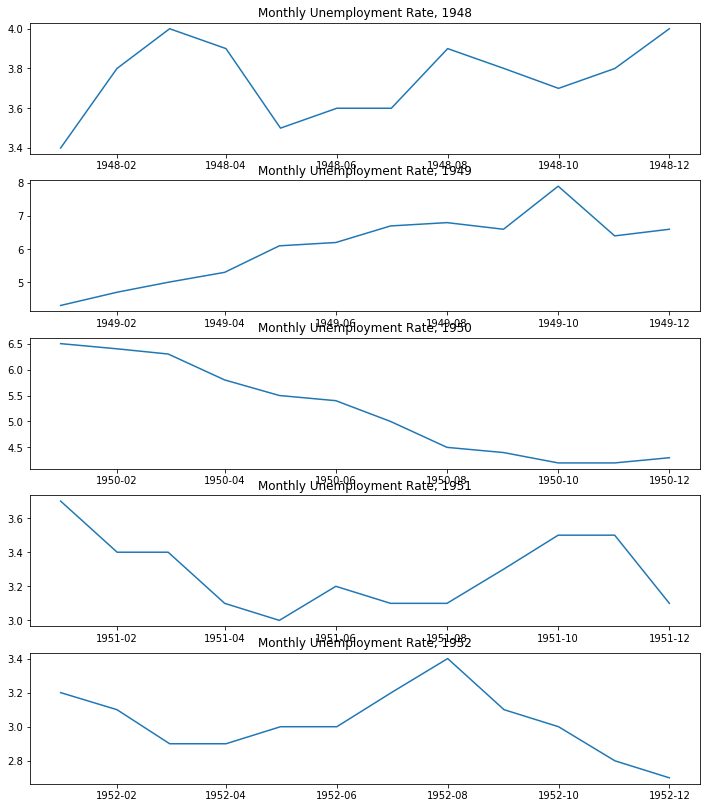

In [19]:
fig_1948_1952 = plt.figure(figsize=(12,14))

for i in range(1953-1948):
    ax= fig_1948_1952.add_subplot(1953-1948,1,i+1)
    ax.plot(unrate[(i*12):(i+1)*12]['DATE'],unrate[(i*12):(i+1)*12]['VALUE'])
    ax.set_title('Monthly Unemployment Rate, 19'+str(48+i))
plt.show()

## Overlay the charts